<a href="https://colab.research.google.com/github/RizaldyAli/PCVK_Ganjil_2023/blob/main/week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NAMA : RIZALDY ALI MACHFUDDIN
# NIM  : 2141720115
# KELAS : TI - 3F

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

## **Konvulasi tanpa Library**

**Membuat fungsi konvulasi**

Fungsi konvolusi yang dibuat memiliki parameter berupa:

  1. citra masukan,
  2. kernel berupa matriks untuk memfilter citra,
  3. nilai stride / besarnya pergeseran untuk setiap konvolusi,
  4. nilai pad yang akan ditambakan pada citra

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [ ]:
img_m = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

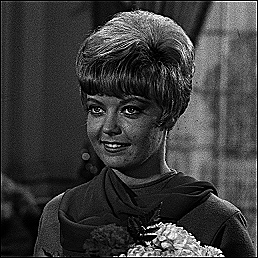

In [ ]:
# SHARPEN

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

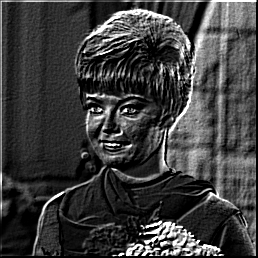

In [ ]:
# EMBOS

kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

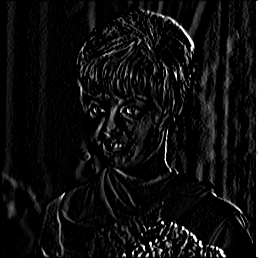

In [ ]:
# Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

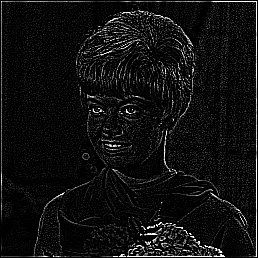

In [ ]:
# Canny edge Detection

kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

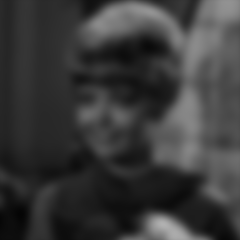

In [ ]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# TUGAS


## KTP 1

In [13]:
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

def hist_equ (image):
  channels = cv.split(image)
  eq_channels = []
  for ch, color in zip(channels, ["r", "g", "b"]):
    eq_channels.append(cv.equalizeHist(ch))

  eq_image = cv.merge(eq_channels)

  return eq_image

def adjust_contrast(image, alpha):
  adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=0)
  return adjusted_image

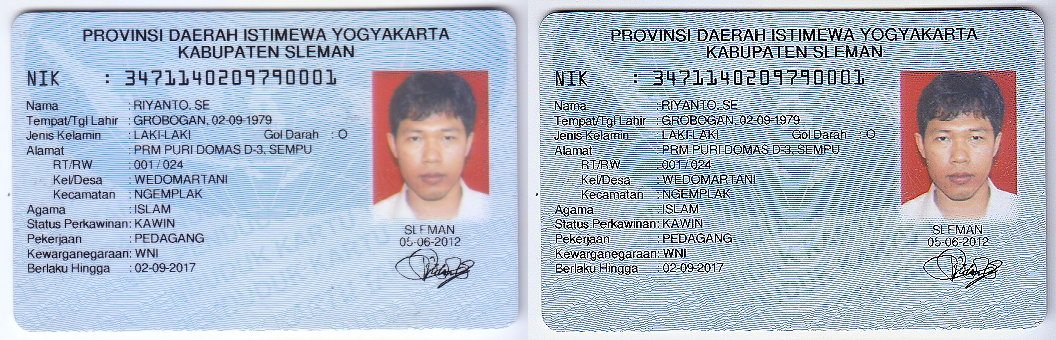

In [15]:
import cv2
ktp1 = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/KTP/ktp.png')
ktp_1 = cv.resize(ktp1, (0,0), fx=0.5, fy=0.5)
brightness = Brightness(ktp_1, -10)
result = cv2.filter2D(brightness, -1, kernel_sharpen)
final_frame = cv.hconcat((ktp_1, result))
cv2_imshow(final_frame)

## KTP 2

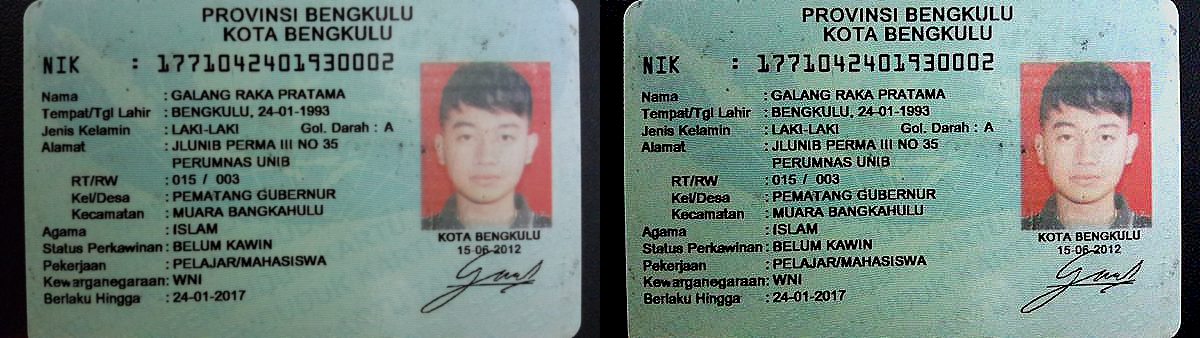

In [16]:
ktp2 = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/KTP/ktp1.png')
contrast = adjust_contrast(ktp2, 1.3)
brightness = Brightness(contrast, -30)
result = cv2.filter2D(brightness, -1, kernel_sharpen)
final_frame = cv.hconcat((ktp2, result))
cv2_imshow(final_frame)

## KTP 3

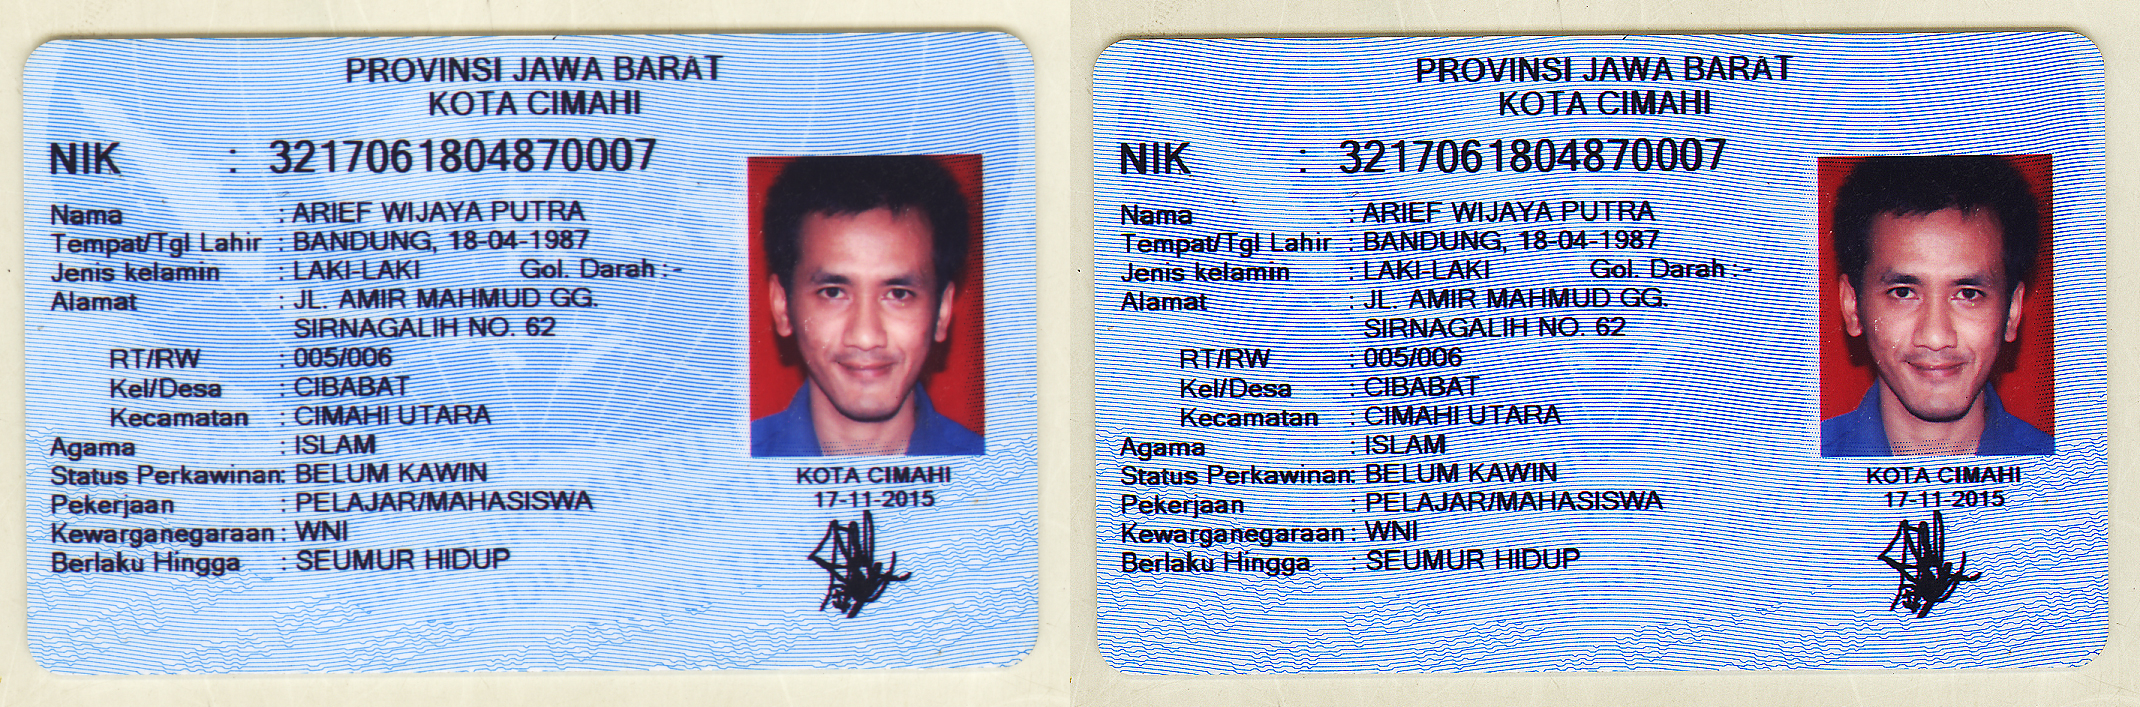

In [17]:
ktp3 = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/KTP/ktp2.png')
brightness = Brightness(ktp3, -10)
result = cv2.filter2D(brightness, -1, kernel_sharpen)
final_frame = cv.hconcat((ktp3, result))
cv2_imshow(final_frame)